In [1]:
import scqubits as scq
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from time import time
import time as tm
from tqdm.notebook import tqdm
import primme as pr

 /var/folders/1p/rx6gwn090ql46kwfqwwf4_6c0000gn/T/ipykernel_67263/2402225946.py: 8

In [2]:
#from Spring2023 import scipy_option_tester
from benchmarking import primme_benchmarker
from benchmarking import generate_heatmap

# BENCHMARK RESULTS FOR ZERO_PI

In [3]:
# We will vary E_J between .125 and .375
# We will vary ECJ between .25 and .75
# We will vary ng between .05 and .15
# We will vary ncut between 15 and 45 counting by 5
# Except ncut all of the parameters will have 10 data points
# zero_pi_results = primme_benchmarker(zero_pi, ["EJ", "ECJ", "ng", "ncut"],[np.linspace(.125,.375, 10), np.linspace(.25,.75,10), np.linspace(.05,.15,10), np.arange(15, 46, 5, dtype=int)],2)
# np.save("zero_pi_results", zero_pi_results)

In [4]:
zero_pi_results = np.load("zero_pi_results.npy")

In [5]:
zero_pi_results

array([[[[1.26983537, 1.3168928 , 0.92910376, ..., 0.69980159,
          0.65559567, 0.54014202],
         [1.25257153, 1.11444754, 0.90197756, ..., 0.77537469,
          0.7162877 , 0.64289579],
         [1.46902182, 1.23569186, 0.76145746, ..., 0.7571026 ,
          0.63716996, 0.690885  ],
         ...,
         [1.20694349, 0.99059385, 0.86420741, ..., 0.64627058,
          0.68904844, 0.67023054],
         [1.34417408, 0.91490179, 0.84006978, ..., 0.65128235,
          0.67478585, 0.65798884],
         [1.43978006, 0.96287694, 0.85090686, ..., 0.60634585,
          0.70472415, 0.60670042]],

        [[1.54254367, 1.14888951, 0.77016946, ..., 0.58468853,
          0.53102582, 0.66171955],
         [1.54783987, 1.0078284 , 1.26879748, ..., 0.6552437 ,
          0.75062767, 0.57050857],
         [1.6731219 , 1.26989443, 0.88218685, ..., 0.65012339,
          0.79309811, 0.72448785],
         ...,
         [1.49079971, 1.43899399, 0.77574564, ..., 0.57965131,
          0.61049328, 0.6

## Plot: E_J vs ncut 

In [6]:
zero_pi_results[:,5,5,:]

array([[1.61822553, 1.19632876, 0.94561511, 0.75983204, 0.69848331,
        0.87842448, 0.62100239],
       [1.76508497, 1.45520151, 0.90513624, 0.95622557, 0.61716831,
        0.52770884, 0.67699063],
       [1.39539513, 1.35111412, 1.02432674, 0.73023206, 0.70419611,
        0.69976348, 0.59686055],
       [1.65210877, 1.23360672, 0.92268381, 0.94955978, 0.77970355,
        0.80943133, 0.63464771],
       [1.40541624, 1.24954074, 0.86126946, 0.79047085, 0.69377108,
        0.68478835, 0.59429938],
       [1.74414775, 1.20132231, 0.94508799, 0.76234114, 0.74146462,
        0.76593908, 0.48595849],
       [1.67400581, 1.60312323, 0.99366016, 0.86067999, 0.72725858,
        0.72029097, 0.55300928],
       [2.24136877, 1.12653477, 0.83658473, 0.82544346, 0.65593097,
        0.75179093, 0.51157676],
       [1.72475005, 1.38949349, 1.01362678, 1.06331737, 0.62668687,
        0.72390051, 0.51742685],
       [1.57661899, 1.08277784, 0.87481279, 0.66003834, 0.69316388,
        0.61459952, 0.5

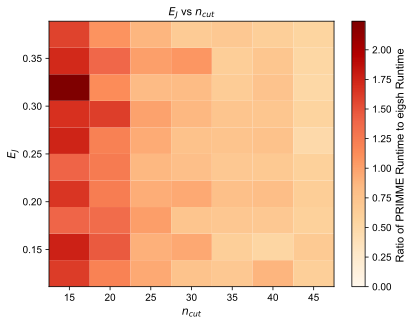

In [13]:
generate_heatmap(zero_pi_results[:,5,5,:], "$E_{J}$ vs $n_{cut}$", np.arange(15, 46, 5, dtype=int), np.linspace(.125,.375, 10), "$n_{cut}$", "$E_J$", "Ratio of PRIMME Runtime to eigsh Runtime ", "Zero-Pi E_J vs n_cut")

## PLOT: E_J vs n_g

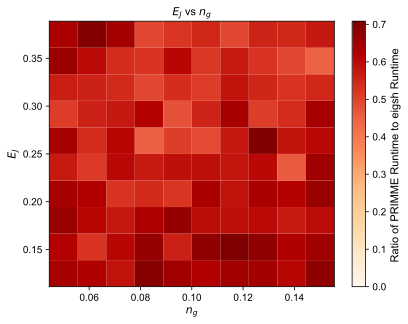

In [22]:
generate_heatmap(zero_pi_results[:,5,:,-1], "$E_{J}$ vs $n_g$", np.linspace(.05,.15,10), np.linspace(.125,.375, 10), "$n_g$", "$E_{J}$", "Ratio of PRIMME Runtime to eigsh Runtime ", "$Zero-Pi E_{J}$ vs $n_g$")

## PLOT: ECJ vs NCUT

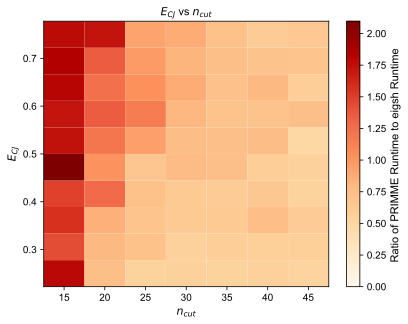

In [26]:
generate_heatmap(zero_pi_results[5,:,5,:], "$E_{CJ}$ vs $n_{cut}$", np.arange(15, 46, 5, dtype=int), np.linspace(.25,.75,10), "$n_{cut}$", "$E_{CJ}$", "Ratio of PRIMME Runtime to eigsh Runtime ", "Zero-Pi ECJ vs ncut")

## n_g vs n_cut

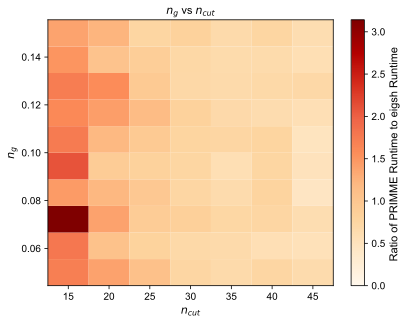

In [27]:
generate_heatmap(zero_pi_results[5,5,:,:], "$n_{g}$ vs $n_{cut}$", np.arange(15, 46, 5, dtype=int), np.linspace(.05,.15,10), "$n_{cut}$", "$n_g$", "Ratio of PRIMME Runtime to eigsh Runtime ", "Zero-Pi ng vs ncut")

## High ncut results

In [50]:
high_ncut = np.load("high_n_zero_pi_results.npy")
# high_N_0Pi = primme_benchmarker(zero_pi, ["EJ", "ncut"],[np.linspace(.125,.375, 15), np.arange(15, 101, 5, dtype=int)],25)

In [51]:
high_ncut.shape

(15, 18)

## PLOT

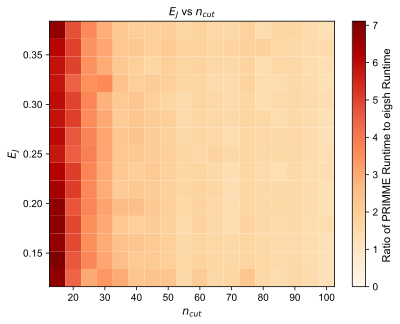

In [53]:
generate_heatmap(high_ncut, "$E_{J}$ vs $n_{cut}$", np.arange(15, 101, 5, dtype=int),np.linspace(.125,.375, 15), "$n_{cut}$", "$E_J$", "Ratio of PRIMME Runtime to eigsh Runtime ", "high n Zero-Pi EJ vs ncut")

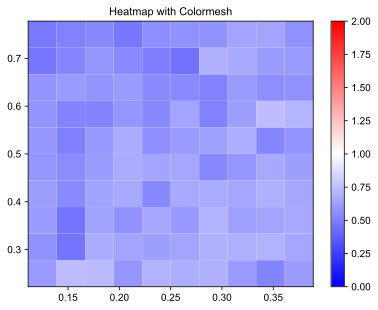

In [10]:
names = ["EJ", "ECJ", "ng", "ncut"],
values = [np.linspace(.125,.375, 10), np.linspace(.25,.75,10), np.linspace(.05,.15,10), np.arange(15, 46, 5, dtype=int)]
x, y = np.meshgrid(values[0], values[1])
z = zero_pi_results[:,:,-1,-1]
fig, ax = plt.subplots()
ax.set_title('Heatmap with Colormesh')
 
plt.pcolormesh(x, y, z, cmap='bwr', vmin = 0, 
                                     vmax =2)
plt.colorbar()
plt.show()

# Benchmark Results for Full Zero-Pi

In [23]:
full_res = np.load("full_zero_pi_results.npy")

In [ ]:
# We will vary E_J between .125 and .375
# We will vary ng between .05 and .15
# We will vary dEJ between .025 and .075
# We will vary ncut between 15 and 45
# We will vary zeta_cutoff between 15 and 45
# full_zero_pi_results = primme_benchmarker(full, 
#                                           ["EJ", "ng", "dEJ", "ncut", "zeta_cutoff"],
#                                           [ np.linspace(.125,.375, 4), 
#                                             np.linspace(.05,.15,4), 
#                                             np.linspace(.025,.075,4), 
#                                              np.arange(15, 46, 5, dtype=int),
#                                             np.arange(15, 46, 5, dtype=int)],5)

In [28]:
full_res.shape

(4, 4, 4, 7, 7)

## E_J vs ncut

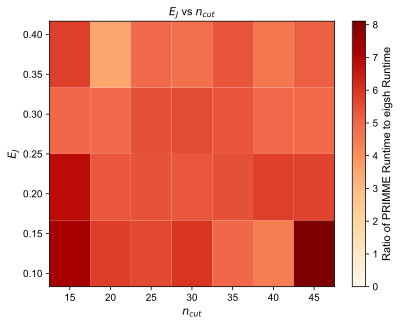

In [34]:
generate_heatmap(full_res[:,1,1,:,-1], "$E_J$ vs $n_{cut}$", np.arange(15, 46, 5, dtype=int), np.linspace(.125,.375, 4),"$n_{cut}$", "$E_J$", "Ratio of PRIMME Runtime to eigsh Runtime", "Full E_J v n_cut" )

## ng vs ncut

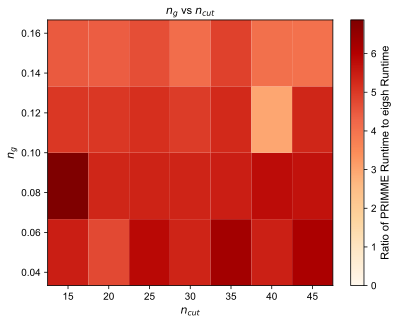

In [35]:
generate_heatmap(full_res[1,:,1,:,-1], "$n_g$ vs $n_{cut}$", np.arange(15, 46, 5, dtype=int), np.linspace(.05,.15,4),"$n_{cut}$", "$n_g$", "Ratio of PRIMME Runtime to eigsh Runtime", "Full n_g v n_cut" )

## DEJ vs  ncut

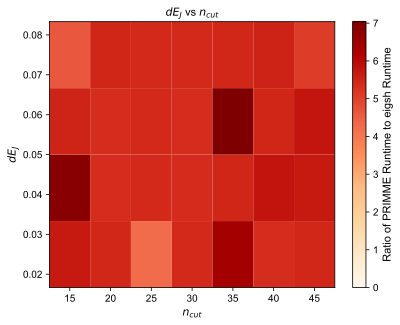

In [36]:
generate_heatmap(full_res[1,1,:,:,-1], "$dE_J$ vs $n_{cut}$", np.arange(15, 46, 5, dtype=int), np.linspace(.025,.075,4),"$n_{cut}$", "$dE_J$", "Ratio of PRIMME Runtime to eigsh Runtime", "Full $dE_J$ vs $n_{cut}$" )

## E_J vs zeta_cut

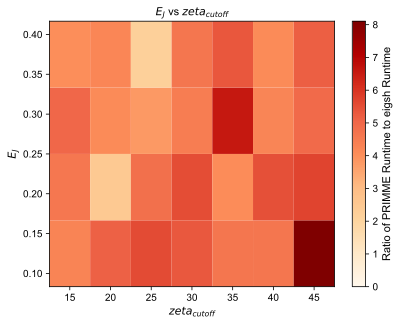

In [42]:
generate_heatmap(full_res[:,1,1,-1,:], "$E_J$ vs $zeta_{cutoff}$", np.arange(15, 46, 5, dtype=int),  np.linspace(.125,.375, 4), "$zeta_{cutoff}$", "$E_J$", "Ratio of PRIMME Runtime to eigsh Runtime", "Full $E_J$ vs $zeta_{cut}$" )

## E_J vs n_g

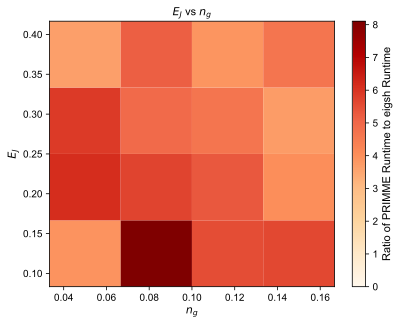

In [44]:
generate_heatmap(full_res[:,:,1,-1,-1], "$E_J$ vs $n_g$", np.linspace(.05,.15,4),  np.linspace(.125,.375, 4), "$n_g$", "$E_J$", "Ratio of PRIMME Runtime to eigsh Runtime", "Full $E_J$ vs $ng$" )

# COS2PHI BENCHMARK RESULTS

In [38]:
cos_res = np.load("cos_2phi_results.npy")

In [45]:
cos_res.shape

(8, 8, 8, 8)

In [ ]:
# We will vary E_J between 7.5 and 22.5
# We will vary ECJ between 1.0 and 3.0
# We will vary phi_cut between 3 and 11
# We will vary ncut between 3 and 11
# cos_2pi_results = primme_benchmarker(cos2phi, 
#                                       ["E_J", "ECJ", "phi_cut", "ncut"],
#                                       [   np.linspace(7.5,22.5, 8), 
#                                           np.linspace(1.0,3.0,8),
#                                           np.arange(3, 11, 1, dtype=int), 
#                                           np.arange(3, 11, 1, dtype=int)   ],
#                                       5)



## ECJ v ncut

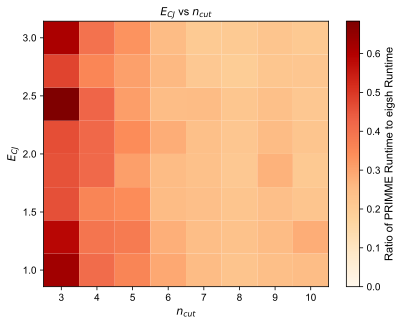

In [47]:
generate_heatmap(cos_res[4,:,-1,:], "$E_{CJ}$ vs $n_{cut}$",  np.arange(3, 11, 1, dtype=int) , np.linspace(1.0,3.0,8), "$n_{cut}$", "$E_{CJ}$", "Ratio of PRIMME Runtime to eigsh Runtime", "Cos $E_J$ vs $ncut$" )

## ECJ vs phicut


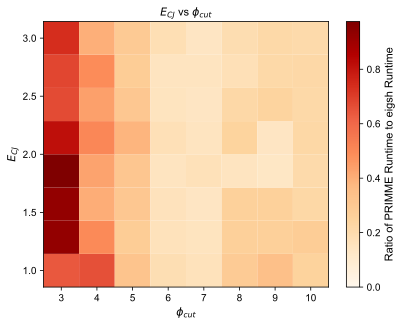

In [48]:
generate_heatmap(cos_res[4,:,:,-1], "$E_{CJ}$ vs $\phi_{cut}$",  np.arange(3, 11, 1, dtype=int) , np.linspace(1.0,3.0,8), "$\phi_{cut}$", "$E_{CJ}$", "Ratio of PRIMME Runtime to eigsh Runtime", "Cos $E_J$ vs $phicut$" )

## EJ vs ECJ

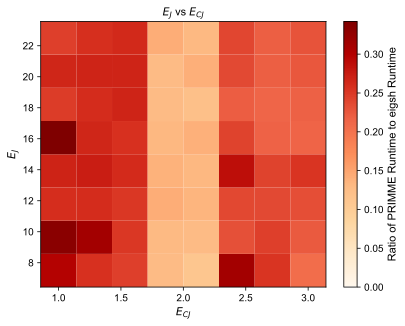

In [49]:
generate_heatmap(cos_res[:,:,-2,-1], "$E_{J}$ vs $E_{CJ}$",  np.linspace(1.0,3.0,8), np.linspace(7.5,22.5, 8) , "$E_{CJ}$", "$E_{J}$", "Ratio of PRIMME Runtime to eigsh Runtime", "Cos $E_{J}$ vs $E_{CJ}$")

In [11]:
# E_J vs E_L for fluxonium
# low EJ = 0 sparse, high E_J dense 